## Sentiment Based Product Recommendation System - Capstone Project

    -  Dinesh L J

## Problem Statement


The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

 

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

 

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

* Data sourcing and sentiment analysis
* Building a recommendation system
* Improving the recommendations using the sentiment analysis model
* Deploying the end-to-end project with a user interface

Heroku Url - https://dinesh-sbprs-captsone.herokuapp.com/


###  Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from datetime import datetime

# Warning suppression
import warnings
warnings.filterwarnings("ignore")



# Stopwords 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')


#  Lemmatization 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Reading and loading the dataset

In [2]:
dataset = pd.read_csv("./dataset/sample30.csv")

#dataset = pd.read_csv('/gdrive/MyDrive/sample30.csv')

In [3]:
dataset.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


### Data Pre-Processing and EDA

In [4]:
dataset.shape

(30000, 15)

- Dataset contains 30000 Rows and 15 columns

In [5]:
dataset.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

 - reviews_rating column Datatype is int64 and others are in the type of object

### Missing values

In [7]:
# Returns the sum of null values in each column
dataset.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [8]:
# Percentage of null values
((dataset.isnull().sum()/dataset.shape[0])*100).round(2)

id                       0.00
brand                    0.00
categories               0.00
manufacturer             0.47
name                     0.00
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_rating           0.00
reviews_text             0.00
reviews_title            0.63
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
user_sentiment           0.00
dtype: float64

- Columns like reviews_didPurchase , reviews_userCity and reviews_userProvince having more null values

In [9]:
# Unique count of the column
for i in dataset.columns:
  print("Unique count of the column %-20s %d"%(i,len(dataset[i].unique())))

Unique count of the column id                   271
Unique count of the column brand                214
Unique count of the column categories           270
Unique count of the column manufacturer         228
Unique count of the column name                 271
Unique count of the column reviews_date         6858
Unique count of the column reviews_didPurchase  3
Unique count of the column reviews_doRecommend  3
Unique count of the column reviews_rating       5
Unique count of the column reviews_text         27282
Unique count of the column reviews_title        18536
Unique count of the column reviews_userCity     978
Unique count of the column reviews_userProvince 43
Unique count of the column reviews_username     24915
Unique count of the column user_sentiment       3


### Ratings Distribution

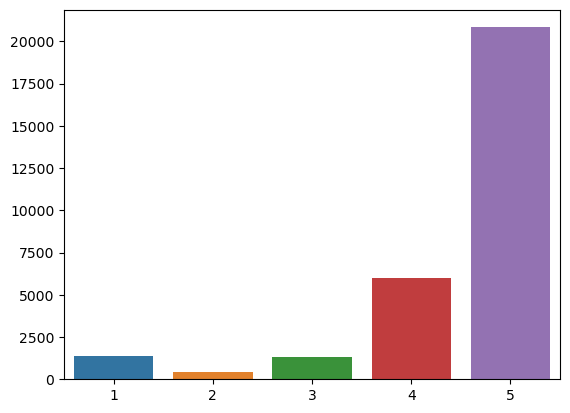

In [10]:
data = dataset['reviews_rating'].value_counts()
sns.barplot(x=data.index, y=data.values)
plt.show()

- Rating 5 having more distribution as comparing to other ratings which clearly shows `imbalance`

### reviews_didPurchase distribution

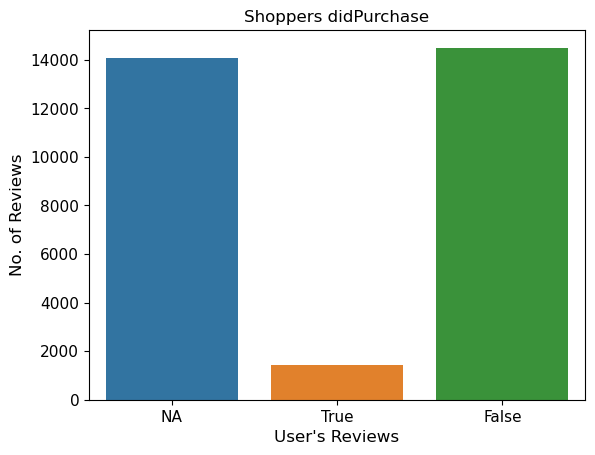

In [11]:
#Replacing Null with NA

dataset['reviews_didPurchase'] = dataset['reviews_didPurchase'].fillna('NA') 
ax_plt = sns.countplot(dataset['reviews_didPurchase'])
ax_plt.set_xlabel(xlabel="User's Reviews",fontsize=12)
ax_plt.set_ylabel(ylabel='No. of Reviews',fontsize=12)
ax_plt.axes.set_title('Shoppers didPurchase',fontsize=12)
ax_plt.tick_params(labelsize=11)
plt.show()

- Shoppers did purchase having more NA values

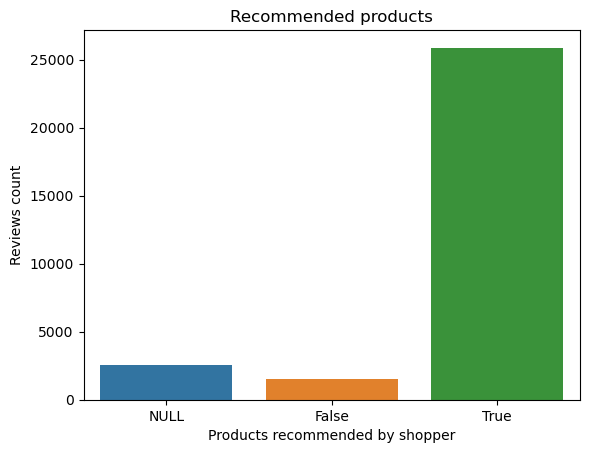

In [12]:
# Replacing null 

dataset['reviews_doRecommend'].fillna('NULL', inplace=True)

#distribution of reviews_didpurchased

ax = sns.countplot(dataset['reviews_doRecommend'])
ax.set_xlabel(xlabel='Products recommended by shopper')
ax.set_ylabel(ylabel='Reviews count')
ax.axes.set_title('Recommended products')
plt.show()


- Significant no. of products are recommended

### User sentiment Postive and Negative distribution

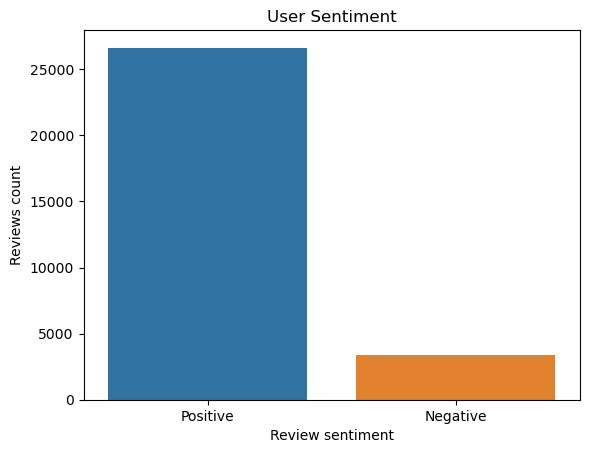

In [13]:
ax = sns.countplot(dataset['user_sentiment'])
ax.set_xlabel(xlabel='Review sentiment')
ax.set_ylabel(ylabel='Reviews count')
ax.axes.set_title('User Sentiment')
plt.show()


-  `user_sentiment` column has more Positive compared to Negative

### Top 10 Brands

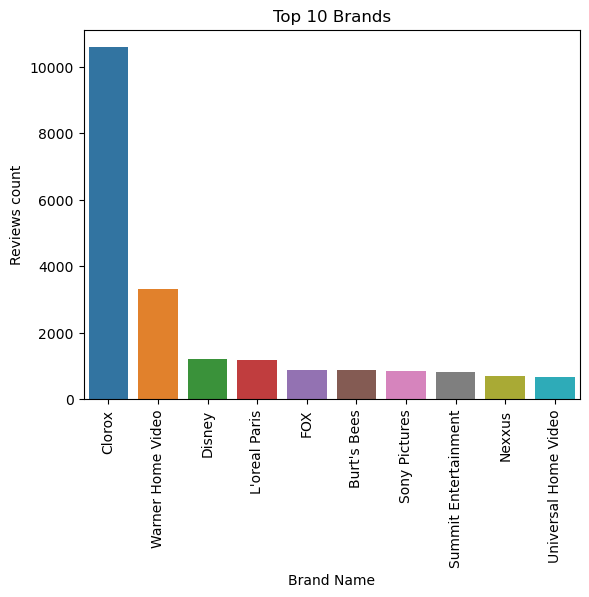

In [14]:
ax = sns.barplot(dataset['brand'].value_counts().index[:10],dataset['brand'].value_counts().values[:10])
plt.xticks (rotation=90)
ax.set_xlabel(xlabel='Brand Name')
ax.set_ylabel(ylabel='Reviews count')
ax.axes.set_title('Top 10 Brands')
plt.show()


- Clorox is a top brand 

### Top 10 reviews_userCity

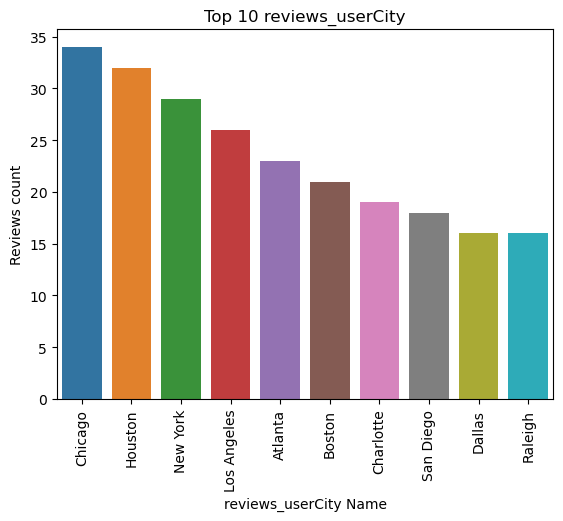

In [15]:
ax = sns.barplot(dataset['reviews_userCity'].value_counts().index[:10],dataset['reviews_userCity'].value_counts().values[:10])
plt.xticks (rotation=90)
ax.set_xlabel(xlabel='reviews_userCity Name')
ax.set_ylabel(ylabel='Reviews count')
ax.axes.set_title('Top 10 reviews_userCity')
plt.show()


- Chicago is having high number of counts comparing to others

### Dropping columns which is not required

In [16]:
dataset = dataset[['name','reviews_rating','reviews_title','reviews_text','reviews_username','user_sentiment']]

In [17]:
dataset.shape

(30000, 6)

- Shape after dropping the columns which is not required

In [18]:
dataset = dataset.drop_duplicates(subset = ['reviews_username','name'])

In [19]:
dataset = dataset.dropna()

In [20]:
dataset.isnull().sum()

name                0
reviews_rating      0
reviews_title       0
reviews_text        0
reviews_username    0
user_sentiment      0
dtype: int64

In [21]:
dataset.shape

(27403, 6)

In [22]:
dataset.head()

,name,reviews_rating,reviews_title,reviews_text,reviews_username,user_sentiment
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,Just Awesome,i love this album. it's very good. more to the...,joshua,Positive
1,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good,Good flavor. This review was collected as part...,dorothy w,Positive
3,K-Y Love Sensuality Pleasure Gel,1,Disappointed,I read through the reviews on here before look...,rebecca,Negative
4,K-Y Love Sensuality Pleasure Gel,1,Irritation,My husband bought this gel for us. The gel cau...,walker557,Negative
5,K-Y Love Sensuality Pleasure Gel,1,Not worth it,My boyfriend and I bought this to spice things...,samantha,Negative


In [23]:
import pickle

# Saving the preprocessed data for future use
pickle.dump(dataset, open('dataset_final.csv', 'wb'))

In [24]:
# regex to eliminate
dataset['reviews_text'] = dataset['reviews_text'].str.replace("[^a-zA-Z#]", " ") 

In [25]:
# Replacing short words
dataset['reviews_text'] = dataset['reviews_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [26]:
# make entire text lowercase
dataset['reviews_text'] = [reviews_text.lower() for reviews_text in dataset['reviews_text']]

In [27]:
# Function to remove stop words 
def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
dataset['reviews_text'] = [remove_stopwords(r) for r in dataset['reviews_text']]

In [28]:
# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


dataset['reviews_text'] = dataset['reviews_text'].apply(lambda x: lemmatize_sentence(x))

In [29]:
dataset['user_sentiment'] = dataset['user_sentiment'].map({'Positive':0,'Negative':1})

In [30]:
dataset.head()

,name,reviews_rating,reviews_title,reviews_text,reviews_username,user_sentiment
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,Just Awesome,love album good hip hop side current pop sound...,joshua,0
1,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good,good flavor review collect part promotion,dorothy w,0
3,K-Y Love Sensuality Pleasure Gel,1,Disappointed,read review look buy one couple lubricant ulti...,rebecca,1
4,K-Y Love Sensuality Pleasure Gel,1,Irritation,husband buy gel gel cause irritation felt like...,walker557,1
5,K-Y Love Sensuality Pleasure Gel,1,Not worth it,boyfriend buy spice thing bedroom highly disap...,samantha,1


In [31]:
X = dataset['reviews_text']
y= dataset['user_sentiment']

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',    # Remove accents and perform other character normalization during the preprocessing step. 
    analyzer='word',            # Whether the feature should be made of word or character n-grams.
    token_pattern=r'\w{1,}',    # Regular expression denoting what constitutes a “token”, only used if analyzer == 'word'
    ngram_range=(1, 3),         # The lower and upper boundary of the range of n-values for different n-grams to be extracted
    stop_words='english',
    sublinear_tf=True)

word_vectorizer.fit(X_train)    # Fiting it on Train
train_word_features = word_vectorizer.transform(X_train)  # Transform on Train

import pickle

filename = 'Vectorizer.pkl'
pickle.dump(word_vectorizer, open(filename, 'wb'))

In [33]:
# transforming the train and test datasets
X_train_transformed = word_vectorizer.transform(X_train.tolist())
X_test_transformed = word_vectorizer.transform(X_test.tolist())


# Print the shape of each dataset.
print('X_train_transformed', X_train_transformed.shape)
print('y_train', y_train.shape)
print('X_test_transformed', X_test_transformed.shape)
print('y_test', y_test.shape)

X_train_transformed (21922, 359097)
y_train (21922,)
X_test_transformed (5481, 359097)
y_test (5481,)


- Since there is a imbalance in the dataset using over sampling technique to over come

In [34]:
#importing over_sampling
from imblearn import over_sampling
ros = over_sampling.RandomOverSampler(random_state=0)

In [35]:
# Split test and train
seed = 70 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [36]:
# Oversampling the dataset.
X_train, y_train = ros.fit_resample(pd.DataFrame(X_train), pd.Series(y_train))

In [37]:
X_train = pd.DataFrame(X_train).iloc[:,0].tolist()

In [38]:
# transforming the train and test datasets

X_train_transformed = word_vectorizer.transform(X_train)
X_test_transformed = word_vectorizer.transform(X_test.tolist())

### Random Forest Model

In [39]:
# Building Random Forest Model.
import time

time1 = time.time()


from sklearn.ensemble._forest import RandomForestClassifier



classifier = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1)
classifier.fit(X_train_transformed,y_train)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 192.12 seconds


In [40]:
# Prediction Train Data
 
from sklearn.metrics import  accuracy_score,classification_report,confusion_matrix


y_pred_train= classifier.predict(X_train_transformed)

print("Random Forest Model accuracy", accuracy_score(y_pred_train, y_train))
print(classification_report(y_pred_train, y_train))



Random Forest Model accuracy 0.9993846334173357
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17058
           1       1.00      1.00      1.00     17068

    accuracy                           1.00     34126
   macro avg       1.00      1.00      1.00     34126
weighted avg       1.00      1.00      1.00     34126



In [41]:
# Prediction Test Data
y_pred_test = classifier.predict(X_test_transformed)

print("Random Forest Model accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))


Random Forest Model accuracy 0.9116895754774358
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      7777
           1       0.35      0.71      0.46       444

    accuracy                           0.91      8221
   macro avg       0.66      0.82      0.71      8221
weighted avg       0.95      0.91      0.93      8221

[[7180  597]
 [ 129  315]]


### Logistic Regression model 

In [42]:
# Building the Logistic Regression model
time1 = time.time()

from sklearn.linear_model import LogisticRegression

logit_sm = LogisticRegression()
logit_sm.fit(X_train_transformed,y_train)



time_taken = time.time() - time1
print('Time Taken in logestic regression : {:.2f} seconds'.format(time_taken))

Time Taken in logestic regression : 10.41 seconds


In [43]:
# Prediction Train Data
y_pred_train= logit_sm.predict(X_train_transformed)

print("Logistic Regression Model accuracy", accuracy_score(y_pred_train, y_train))
print(classification_report(y_pred_train, y_train))

Logistic Regression Model accuracy 0.9870773017640508
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16714
           1       1.00      0.98      0.99     17412

    accuracy                           0.99     34126
   macro avg       0.99      0.99      0.99     34126
weighted avg       0.99      0.99      0.99     34126



In [44]:
# Prediction Test Data
y_pred_test = logit_sm.predict(X_test_transformed)

print("Logistic Regression Model accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))



Logistic Regression Model accuracy 0.9102298990390464
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7115
           1       0.70      0.58      0.63      1106

    accuracy                           0.91      8221
   macro avg       0.82      0.77      0.79      8221
weighted avg       0.90      0.91      0.91      8221

[[6843  272]
 [ 466  640]]


### xgboost  model

In [45]:
# Building the xgboost  model
time1 = time.time()

import xgboost as xgb

time1 = time.time()

xgb = xgb.XGBClassifier(n_estimators=100, random_state=seed, n_jobs=-1)
xgb.fit(X_train_transformed,y_train)


time_taken = time.time() - time1
print('Time Taken in xgboost : {:.2f} seconds'.format(time_taken))

[20:27:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time Taken in xgboost : 41.40 seconds


In [46]:
# Prediction Train Data
y_pred_train= xgb.predict(X_train_transformed)

print("XGBoost Model accuracy", accuracy_score(y_pred_train, y_train))
print(classification_report(y_pred_train, y_train))

XGBoost Model accuracy 0.9523530445994257
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     15799
           1       0.99      0.92      0.95     18327

    accuracy                           0.95     34126
   macro avg       0.95      0.95      0.95     34126
weighted avg       0.96      0.95      0.95     34126



In [47]:
# Prediction Test Data
y_pred_test = xgb.predict(X_test_transformed)

print("XGBoost Model accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))

XGBoost Model accuracy 0.884442281960832
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6695
           1       0.82      0.49      0.61      1526

    accuracy                           0.88      8221
   macro avg       0.85      0.73      0.77      8221
weighted avg       0.88      0.88      0.87      8221

[[6527  168]
 [ 782  744]]


### Naive bayes model

In [48]:
from sklearn.naive_bayes import MultinomialNB

cls_mnb = MultinomialNB()

t1 = time.time()

cls_mnb = MultinomialNB()
cls_mnb.fit(X_train_transformed,y_train)

t2 = time.time()
print('Time Taken: {:.2f} seconds'.format(t2-t1))

Time Taken: 0.13 seconds


In [49]:
y_train_pred_mnb = cls_mnb.predict(X_train_transformed)

print("Naive Bayes accuracy on train data", accuracy_score(y_train_pred_mnb, y_train),"\n")
print(classification_report(y_train_pred_mnb, y_train))

Naive Bayes accuracy on train data 0.9779640157064995 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     16681
           1       0.99      0.97      0.98     17445

    accuracy                           0.98     34126
   macro avg       0.98      0.98      0.98     34126
weighted avg       0.98      0.98      0.98     34126



In [50]:
y_test_pred_mnb = cls_mnb.predict(X_test_transformed)

print("Naive Bayes accuracy on test data", accuracy_score(y_test_pred_mnb, y_test),"\n")
print(classification_report(y_test_pred_mnb, y_test))

Naive Bayes accuracy on test data 0.8574382678506265 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6873
           1       0.60      0.40      0.48      1348

    accuracy                           0.86      8221
   macro avg       0.74      0.68      0.70      8221
weighted avg       0.84      0.86      0.85      8221



### Dumping Logistic Regression model since it's performed well as comparing to other models metrics

In [51]:
filename = 'final_model.pkl'
pickle.dump(logit_sm, open(filename, 'wb'))

## Recommandation System

### User - User based

In [52]:
dataset = pd.read_csv('./dataset/sample30.csv')

In [53]:
dataset = dataset.drop_duplicates(subset = ['reviews_username','name'])

In [54]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.30, random_state=31)

In [55]:
print(train.shape)
print(test.shape)

(19323, 15)
(8282, 15)


In [56]:
#  Pivot with products and users

df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

df_pivot.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Removing NaN
df_pivot = df_pivot.iloc[1: , :]
df_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
#  dummy train to recommend products which was not familiar with the customers earlier

dummy_train = train.copy()

In [59]:
# products not rated by user assigned to 1

dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [60]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot(
   index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

In [61]:
# Removing NaN
dummy_train = dummy_train.iloc[1:]
dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [62]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [63]:
user_correlation.shape

(17882, 17882)

In [64]:
# Creating matrix.
df_pivot = train.pivot(
     index='reviews_username',
    columns='name',
    values='reviews_rating'
)

In [65]:
df_pivot = df_pivot.iloc[1:]
df_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Normalising the rating  

mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [67]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [69]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:

user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
user_predicted_ratings.shape

(17882, 251)

In [72]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Top 20 product Recommendation

In [73]:
# Take the user ID as input.
user_input = (input("Enter your user name"))
print(user_input)

Enter your user namesamantha
samantha


In [74]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                  15.739293
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                               7.891731
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                         6.973131
Tostitos Bite Size Tortilla Chips                                                                 4.927950
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                                              4.176969
Burt's Bees Lip Shimmer, Raisin                                                                   3.865692
The Honest Company Laundry Detergent                                                              3.535534
Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com     3.535534
Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home                                      3.535534
Olay Regenerist Deep Hydration R

### Evaluation

In [75]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1107, 15)

In [76]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [77]:
common_user_based_matrix.shape

(916, 123)

In [78]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [79]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17872,17873,17874,17875,17876,17877,17878,17879,17880,17881
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [81]:
user_correlation_df_1.shape

(916, 17882)

In [82]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [83]:
user_correlation_df_3 = user_correlation_df_2.T

In [84]:
user_correlation_df_3.head()

,1234,abbi,abby,abismomy,ac94,acjuarez08,actionaction,adam,adelynsmom,adriana9999,...,wolverine,wonderwoman,wonster67,worm,wvshopaholic,xstr8edgex,yeyo,yummy,zippy,zmom
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abbi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abby,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abismomy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ac94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
user_correlation_df_3.shape

(916, 916)

In [86]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 6.77529263, 0.        ,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [87]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [88]:
dummy_test.shape

(916, 123)

In [89]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [90]:
common_user_predicted_ratings.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abbi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [92]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [93]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

### RMSE for user - user

In [94]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.5305248610009663


### Item - Item based 

In [95]:
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot = df_pivot.iloc[: , 1:]

df_pivot.head()

reviews_username,00dog3,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1085,11111111aaaaaaaaaaaaaaaaa,1143mom,...,zpalma,zsazsa,zt313,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [97]:
df_subtracted = df_subtracted.iloc[: , 1:]

df_subtracted.head()

reviews_username,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1085,11111111aaaaaaaaaaaaaaaaa,1143mom,11677j,...,zpalma,zsazsa,zt313,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,0.336842,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [99]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [100]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00737942, 0.00429604,
        0.00184633],
       [0.        , 0.        , 0.        , ..., 0.00590354, 0.00343683,
        0.00147706],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00059098,
        0.        ],
       [0.        , 0.04929854, 0.        , ..., 0.        , 0.02240396,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00118196,
        0.        ]])

In [101]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.006799,0.0,0.000000,0.0,0.0,0.007379,0.004296,0.001846
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.005439,0.0,0.000000,0.0,0.0,0.005904,0.003437,0.001477
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006252,...,0.0,0.0,0.000000,0.0,0.006252,0.0,0.0,0.000000,0.001477,0.000000
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006252,...,0.0,0.0,0.000000,0.0,0.006252,0.0,0.0,0.000000,0.001477,0.000000


### Product Recommendation

In [102]:
# Take the user ID as input
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user namekaren
karen


In [103]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

name
Hormel Chili, No Beans                                                             0.107752
Chips Deluxe Soft 'n Chewy Cookies                                                 0.105081
Vaseline Intensive Care Healthy Hands Stronger Nails                               0.043695
Coty Airspun Face Powder, Translucent Extra Coverage                               0.041113
Ragu Roasted Garlic Parmesan Pasta Sauce                                           0.040076
Tostitos Bite Size Tortilla Chips                                                  0.038980
Mill Creek Aloe Vera & Paba Lotion                                                 0.035524
Tostitos Simply Blue Corn Tortilla Chips                                           0.032631
Tree Hut Shea Body Butters, Coconut Lime, 7 oz                                     0.024107
There's Something About Mary (dvd)                                                 0.018925
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd            

### Evaluation

In [104]:
common =  test[test.name.isin(train.name)]
common.shape

(8260, 15)

In [105]:
common.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
13119,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-02T00:00:00.000Z,False,True,5,very easy to clean anything from kitchen to ba...,cloroxlover4eva,NaN,NaN,cloroxlover4evarrr,Positive
3670,AVpe78stLJeJML43ytOY,Arrid,"Personal Care,Deodorants & Antiperspirants,Deo...",Arrid,Arrid Extra Dry Anti-Perspirant Deodorant Spra...,2015-11-07T00:00:00.000Z,False,True,4,The only thing we ever use. EFFECTIVE.,effective,NaN,NaN,kays,Positive
6443,AVpf385g1cnluZ0-s0_t,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,...",Hormel,"Hormel Chili, No Beans",2016-11-08T00:00:00.000Z,True,True,5,I use this for chili cheese dip. Very good,Great Product,NaN,NaN,katcookie,Positive
22243,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2013-07-13T00:00:00.000Z,NaN,True,4,Easy to recognize characters from Alex Cross b...,Good movie for Alex Cross fans.,NaN,NaN,par2golf,Positive
4946,AVpf0eb2LJeJML43EVSt,Sony Pictures,"Movies, Music & Books,Ways To Shop Entertainme...",SONY CORP,The Resident Evil Collection 5 Discs (blu-Ray),2016-12-31T00:00:00.000Z,NaN,True,5,Pretty great collection and price was great bu...,Great collection,NaN,NaN,sxiong8,Positive


In [106]:
common_item_based_matrix = common.pivot_table(index='reviews_username',columns='name',values='reviews_rating').T

In [107]:
common_item_based_matrix.shape

(196, 7927)

In [108]:
item_correlation_df = pd.DataFrame(item_correlation)

In [109]:
item_correlation_df

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.005299,0.0,0.0
247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0
248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.005299,0.0,1.000000,0.0,0.0
249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0


In [110]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
list_name = common.name.tolist()

In [112]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [113]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [114]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0397039 , 0.        , 0.        , ..., 0.        , 0.02306966,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00442765, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01344238, 0.00257762, 0.00147745, ..., 0.00147745, 0.        ,
        0.00147745],
       [0.        , 0.0011078 , 0.        , ..., 0.        , 0.01385098,
        0.        ]])

In [116]:
common_item_predicted_ratings.shape

(196, 7927)

In [117]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username',columns='name',values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [118]:
common_ = common.pivot_table(index='reviews_username',columns='name',values='reviews_rating').T

In [119]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *
import warnings
warnings.filterwarnings("ignore")

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [120]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

### RMSE for Item - Item

In [121]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5593328243925693


### Dumping User - User based model since it has less RMSE comparing to Item - Item

In [122]:
filename = 'user_final_rating.pkl'
pickle.dump(user_final_rating, open(filename, 'wb'))


## Top 5 Product Recommendation

In [123]:
# Loading all the required pickle whihc dumped earlier
mapping = pickle.load(open('./pickle/dataset_final.csv', 'rb'))
user_rating = pickle.load(open('./pickle/user_final_rating.pkl', 'rb'))
word_vectorizer = pickle.load(open('./pickle/Vectorizer.pkl', 'rb'))
model = pickle.load(open('./pickle/final_model.pkl', 'rb'))

In [124]:
user = str('joshua')

In [125]:
#Top 20 Products recommendation
top_20_products = user_rating.loc[user].sort_values(ascending=False)[0:20]
        

In [126]:
# Merging the top20 products
df = pd.merge(top_20_products, mapping, left_on='name', right_on='name', how='left')

In [130]:
# Applying Word vectorizer        
reviews = df['reviews_text'].values.astype('U')
reviews_transformed = word_vectorizer.transform(reviews.tolist())

In [132]:
# Model prediction    
pred_val = model.predict(reviews_transformed)
df['user_sentiment'] = pred_val


# Sentiment filteration
pro = df.groupby('name')['user_sentiment'].mean()
pro = pro.reset_index()
#Top5 Products recommendation
top_5_products = pro.sort_values(by='user_sentiment', ascending=False)[0:5]
print(top_5_products)

                                                 name  user_sentiment
18  WeatherTech 40647 14-15 Outlander Cargo Liners...        1.000000
3                       Colorganics Lipstick, Cayenne        1.000000
13          Nexxus Exxtra Gel Style Creation Sculptor        0.613537
19  Windex Original Glass Cleaner Refill 67.6oz (2...        0.333333
0   Chips Ahoy! Original Chocolate Chip - Cookies ...        0.260870
